# Problem 1

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

In [5]:
data = pd.read_csv('customer_churn.csv')

# Replace empty strings with NaN
data['TotalCharges'] = data['TotalCharges'].replace('', np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Divide into numerical and categorical features (excluding 'customerID')
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in data.columns if col not in (numerical_features + ['customerID'])]

Two strategies will be used to deal with null/empty values in the dataset. The first will be simply dropping rows that have null values, and the second will be replacing them with a default value, which is the mean value for that feature. These strategies will then be compared based on their performance.

In [25]:
# Check for missing values
missing_values = data.isnull().sum()

# Print the features with missing values
print("Features with missing values:")
print(missing_values[missing_values > 0])

# Strategy 1: Drop rows with null values
data_strategy1 = data.dropna()
print("Strategy 1 shape:", data_strategy1.shape)

# Strategy 2: Fill null values with the mean
total_charges_mean = data['TotalCharges'].mean()
data_strategy2 = data.copy()
data_strategy2['TotalCharges'] = data_strategy2['TotalCharges'].fillna(total_charges_mean)
print("Strategy 2 shape:", data_strategy2.shape)

# One-Hot Encoding for Categorical Data
data_strategy1 = pd.get_dummies(data_strategy1, columns=categorical_features, drop_first=True)
data_strategy2 = pd.get_dummies(data_strategy2, columns=categorical_features, drop_first=True)

# Prepare features and target for both strategies
X_strategy1 = data_strategy1.drop(columns=['customerID', 'Churn_Yes'])
y_strategy1 = data_strategy1['Churn_Yes']

X_strategy2 = data_strategy2.drop(columns=['customerID', 'Churn_Yes'])
y_strategy2 = data_strategy2['Churn_Yes']

Features with missing values:
TotalCharges    11
dtype: int64
Strategy 1 shape: (7032, 21)
Strategy 2 shape: (7043, 21)


## Model Training and Evaluation

Two classification models will be evaluated: first Logistic Regression and then Naive Bayes.

In [45]:
# Initialize models
lr_model = LogisticRegression(random_state=42, max_iter=1000)
nb_model = GaussianNB()

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


# Strategy 1 - Drop rows with null values
print("=" * 50)
print("STRATEGY 1: Drop rows with null values")
print("=" * 50)

# 5-fold cross-validation for Logistic Regression - Strategy 1
cv_results_lr_strategy1 = cross_validate(lr_model, X_strategy1, y_strategy1, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                               scoring=scoring, return_train_score=False)

print(f"Logistic Regression (Strategy 1) 5-Fold Cross-Validation Results:")
for metric in scoring:
    mean_score = cv_results_lr_strategy1[f'test_{metric}'].mean()
    std_score = cv_results_lr_strategy1[f'test_{metric}'].std()
    print(f"{metric.capitalize()}:  {mean_score:.4f} ± {std_score:.4f}")

print("-" * 50)

# 5-fold cross-validation for Naive Bayes - Strategy 1
cv_results_nb_strategy1 = cross_validate(nb_model, X_strategy1, y_strategy1, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                               scoring=scoring, return_train_score=False)

print(f"Naive Bayes (Strategy 1) 5-Fold Cross-Validation Results:")
for metric in scoring:
    mean_score = cv_results_nb_strategy1[f'test_{metric}'].mean()
    std_score = cv_results_nb_strategy1[f'test_{metric}'].std()
    print(f"{metric.capitalize()}:  {mean_score:.4f} ± {std_score:.4f}")

print()
print("=" * 50)
print("STRATEGY 2: Replace null values with mean")
print("=" * 50)


# 5-fold cross-validation for Logistic Regression - Strategy 2
cv_results_lr_strategy2 = cross_validate(lr_model, X_strategy2, y_strategy2, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                               scoring=scoring, return_train_score=False)

print(f"Logistic Regression (Strategy 2) 5-Fold Cross-Validation Results:")
for metric in scoring:
    mean_score = cv_results_lr_strategy2[f'test_{metric}'].mean()
    std_score = cv_results_lr_strategy2[f'test_{metric}'].std()
    print(f"{metric.capitalize()}:  {mean_score:.4f} ± {std_score:.4f}")

print("-" * 50)

# 5-fold cross-validation for Naive Bayes - Strategy 2
cv_results_nb_strategy2 = cross_validate(nb_model, X_strategy2, y_strategy2, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                               scoring=scoring, return_train_score=False)

print(f"Naive Bayes (Strategy 2) 5-Fold Cross-Validation Results:")
for metric in scoring:
    mean_score = cv_results_nb_strategy2[f'test_{metric}'].mean()
    std_score = cv_results_nb_strategy2[f'test_{metric}'].std()
    print(f"{metric.capitalize()}:  {mean_score:.4f} ± {std_score:.4f}")

STRATEGY 1: Drop rows with null values
Logistic Regression (Strategy 1) 5-Fold Cross-Validation Results:
Accuracy:  0.8049 ± 0.0064
Precision:  0.6586 ± 0.0163
Recall:  0.5527 ± 0.0087
F1:  0.6010 ± 0.0115
Roc_auc:  0.8452 ± 0.0026
--------------------------------------------------
Naive Bayes (Strategy 1) 5-Fold Cross-Validation Results:
Accuracy:  0.6633 ± 0.0068
Precision:  0.4338 ± 0.0060
Recall:  0.8748 ± 0.0141
F1:  0.5800 ± 0.0076
Roc_auc:  0.8190 ± 0.0068

STRATEGY 2: Replace null values with mean
Logistic Regression (Strategy 2) 5-Fold Cross-Validation Results:
Accuracy:  0.8056 ± 0.0107
Precision:  0.6590 ± 0.0210
Recall:  0.5532 ± 0.0317
F1:  0.6013 ± 0.0270
Roc_auc:  0.8449 ± 0.0134
--------------------------------------------------
Naive Bayes (Strategy 2) 5-Fold Cross-Validation Results:
Accuracy:  0.6632 ± 0.0099
Precision:  0.4333 ± 0.0088
Recall:  0.8737 ± 0.0147
F1:  0.5793 ± 0.0102
Roc_auc:  0.8198 ± 0.0141


## Results and Analysis

In [49]:
results_summary = {
    'Model': [],
    'Strategy': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Function to extract mean scores
def extract_mean_scores(cv_results):
    return {
        'Accuracy': cv_results['test_accuracy'].mean(),
        'Precision': cv_results['test_precision'].mean(),
        'Recall': cv_results['test_recall'].mean(),
        'F1 Score': cv_results['test_f1'].mean(),
        'ROC AUC': cv_results['test_roc_auc'].mean()
    }

# Dictionary of models and their results
model_results = {
    'Logistic Regression': {'Drop Nulls': cv_results_lr_strategy1, 'Fill Mean': cv_results_lr_strategy2},
    'Naive Bayes': {'Drop Nulls': cv_results_nb_strategy1, 'Fill Mean': cv_results_nb_strategy2}
}

# Populate the dictionary with results
for model_name, strategies in model_results.items():
    for strategy_name, cv_results in strategies.items():
        scores = extract_mean_scores(cv_results)
        results_summary['Model'].append(model_name)
        results_summary['Strategy'].append(strategy_name)
        results_summary['Accuracy'].append(scores['Accuracy'])
        results_summary['Precision'].append(scores['Precision'])
        results_summary['Recall'].append(scores['Recall'])
        results_summary['F1 Score'].append(scores['F1 Score'])
        results_summary['ROC AUC'].append(scores['ROC AUC'])

# Create a data frame from the summary
results_df = pd.DataFrame(results_summary)

display(results_df)

,Model,Strategy,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,Drop Nulls,0.804891,0.658557,0.552696,0.600970,0.845157
1,Logistic Regression,Fill Mean,0.805619,0.658986,0.553211,0.601334,0.844902
2,Naive Bayes,Drop Nulls,0.663251,0.433829,0.874805,0.579992,0.819023
3,Naive Bayes,Fill Mean,0.663211,0.433348,0.873715,0.579316,0.819849


**Comparison of the two preprocessing strategies:** \
Because of the low number of null values present in the data set (only 11 rows in the TotalCharges column), the differing strategies had very little impact on the overall performance of either model. As we can see in the above evaluation output, every evaluation metric is within one standard deviation of each other between the two strategies for each model.

\
**Comparison of the two models:** \
The Logistic Regression model performed better than the Naive Bayes classifier in every metric except for recall, indicating that Naive Bayes is better at identifying true positives, and is likely biased toward predicting churn as opposed to not. \
The superior performance of the Logistic Regression model in this case is likely due to the assumption of independence in Naive Bayes. This data set contains features that are highly correlated, such as Tenure and TotalCharges, or MonthlyCharges and TotalCharges, causing that assumption not to hold. Logistic Regression is better at handling this multicollinearity.

\


## Insights and Conclusion

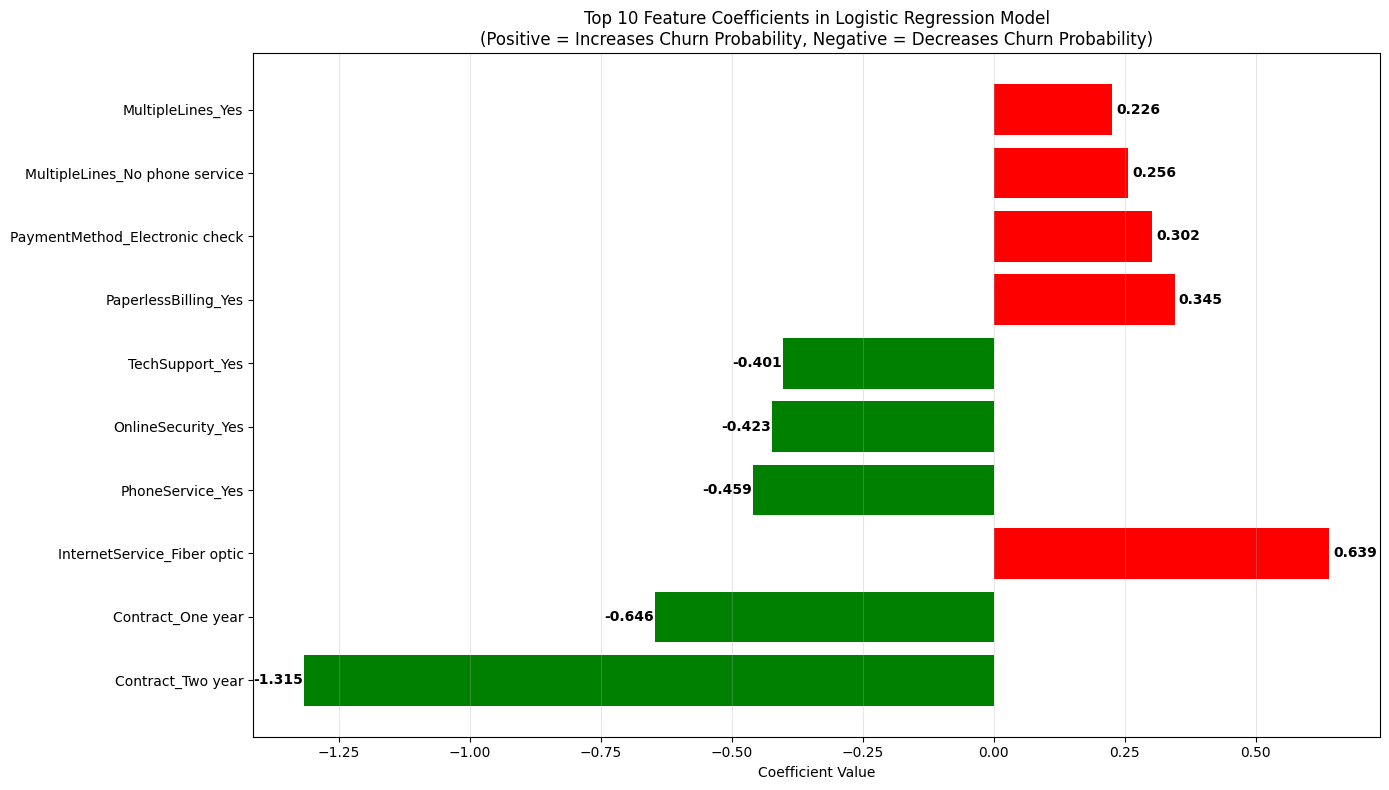

In [64]:
def analyze_feature_importance(X, y, feature_names):

    # Train the model
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X, y)

    # Get feature coefficients
    coefficients = lr_model.coef_[0]

    # Create feature importance dataframe
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)

    return feature_importance, lr_model

# Analyze feature importance for Strategy 1
feature_names = X_strategy1.columns.tolist()
feature_importance_s1, model_s1 = analyze_feature_importance(X_strategy1, y_strategy1, feature_names)

# Visualize feature importance
plt.figure(figsize=(14, 8))
top_features = feature_importance_s1.head(10)
bars = plt.barh(range(len(top_features)), top_features['Coefficient'],
                color=['green' if x < 0 else 'red' for x in top_features['Coefficient']])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients in Logistic Regression Model\n(Positive = Increases Churn Probability, Negative = Decreases Churn Probability)')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_features['Coefficient'])):
    plt.text(value + (0.05 if value > 0 else -0.05), i, f'{value:.3f}',
             va='center', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

**Insights** \
The above chart shows the top 10 most important features in the logistic regression model, or the strongest indicators of churn. As can be seen, the strongest indicators that a customer will not churn is if they are engaged in longer term contracts such as the one or two-year contracts. Additionally, if the customer has features such as tech support and online security for their internet service, they are less likely to churn. The feature associated with the highest likelihood of churn is if a customer has fiber optic internet service, possibly indicating dissatisfaction with that particular service.

\

**Conclusion** \
The Logistic Regression model performs best overall for predicting customer churn in this data set, likely due to the strong independence assumption of Naive Bayes, making it my recommended algorithm. However, if one wanted to prioritize identifying as many churning customers as possible (high recall), then Naive Bayes would be the model to go with. Because neither pre processing strategy has a strong impact one way or the other, either is valid when building models for this data set.

# Problem 2

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import uniform

img = cv2.imread('test_image.png')
height, width, channels = np.shape(img)

# Convert img to RGB format
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def distance(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

def k_means(img, k, max_iterations):
  # Reshape the image data
  pixels = img.reshape((-1, channels))

  # Randomly select centroids
  centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]

  # Optimize centroids
  iteration = 0
  prev_centroids = None

  # Main loop
  while np.not_equal(centroids, prev_centroids).any() and iteration < max_iterations:
    prev_centroids = centroids.copy()

    # Sort each data point, assigning to the nearest centroid
    sorted_points = [[] for _ in range(k)]
    for pixel in pixels:
      distances = distance(pixel, centroids)
      centroid_idx = np.argmin(distances)
      sorted_points[centroid_idx].append(pixel)

    # Recalculate centroids
    centroids = []
    for i in range(k):
        if sorted_points[i]:  # Avoid division by zero if a cluster is empty
            centroids.append(np.mean(sorted_points[i], axis=0))
        else:
            # If a cluster is empty, reinitialize its centroid randomly
            centroids.append(pixels[np.random.choice(pixels.shape[0])])

    centroids = np.array(centroids)
    iteration += 1

  # Assign each pixel to its final centroid
  labels = []
  for pixel in pixels:
    distances = distance(pixel, centroids)
    labels.append(np.argmin(distances))

  # Replace pixel values with centroid values
  clustered_img = np.array([centroids[label] for label in labels], dtype=np.uint8)

  # Reshape back to original image dimensions
  clustered_img = clustered_img.reshape((height, width, channels))

  print(f"Number of iterations: {iteration}")

  return clustered_img, centroids, labels

## Experimentation


Running k-means for k = 3
Number of iterations: 36


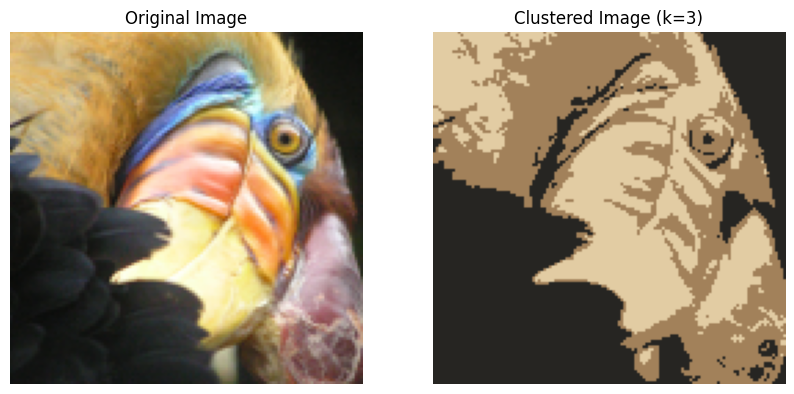


Running k-means for k = 5
Number of iterations: 38


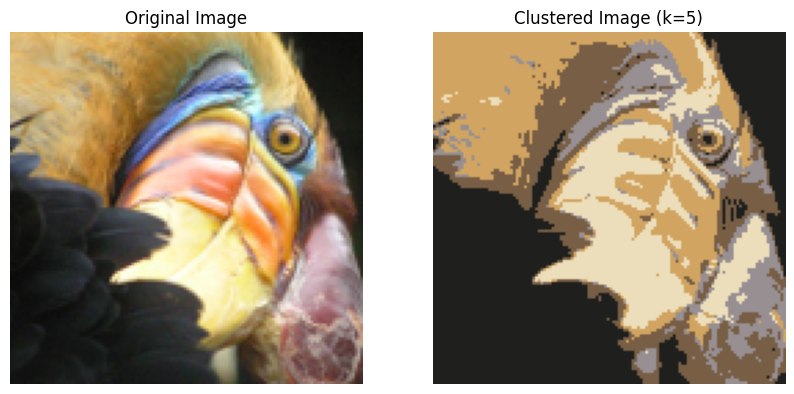


Running k-means for k = 10
Number of iterations: 76


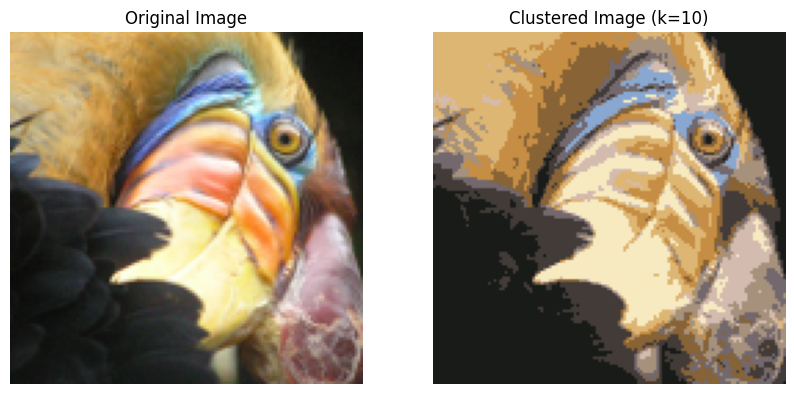


Running k-means for k = 15
Number of iterations: 43


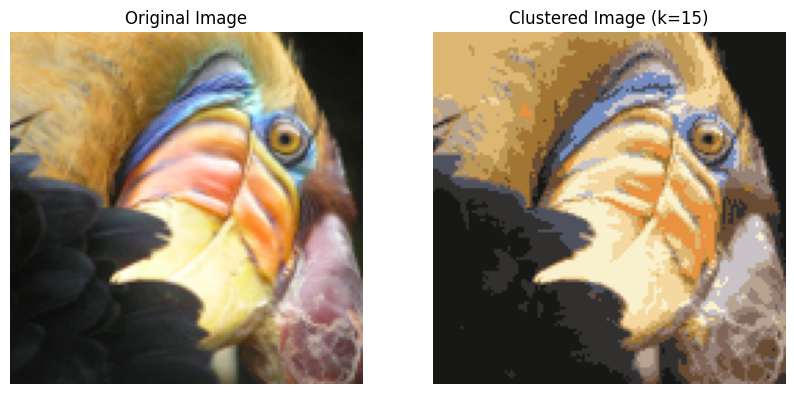

In [15]:
# Experiments with different k values
k_values = [3, 5, 10, 15]
max_iterations = 100

for k in k_values:
    print(f"\nRunning k-means for k = {k}")
    clustered_image, final_centroids, pixel_labels = k_means(RGB_img, k, max_iterations)

    # Display the original and clustered images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(RGB_img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(clustered_image)
    plt.title(f'Clustered Image (k={k})')
    plt.axis('off')

    plt.show()

Above is the output for 4 different values of k using the k-means clustering algorithm. Starting with k = 3, we do not see much definition in the image with only three colors present. The birds features are just barely able to be made out. Next, there is k = 5, where there is much more definition with the two added colors. The two-fold jump from k = 5 to k = 10 did not have as large of an impact on image quality. Finally, k = 15 shows an image very close to the original, with all features able to be made out, although the max iterations were reached. \
\
I believe that k = 15 to be the best value for this problem, as it is the first one that has enough colors to show complex definitions in the image. That value, however, is not the most time efficient for this problem, as it maxed out at 100 iterations, taking quite some time to execute.